# Finch Carr - Lab 06: Confidence Intervals
## Lab 06 Setup
- I am told to make a fake background using a Poisson distribution with a mean of 100

In [1]:
# Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle as pk
import h5py
%matplotlib inline

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

## Problem 1)
- I need to plot a fake Poisson background with the given characteristics and find its 5$\sigma$ threshold

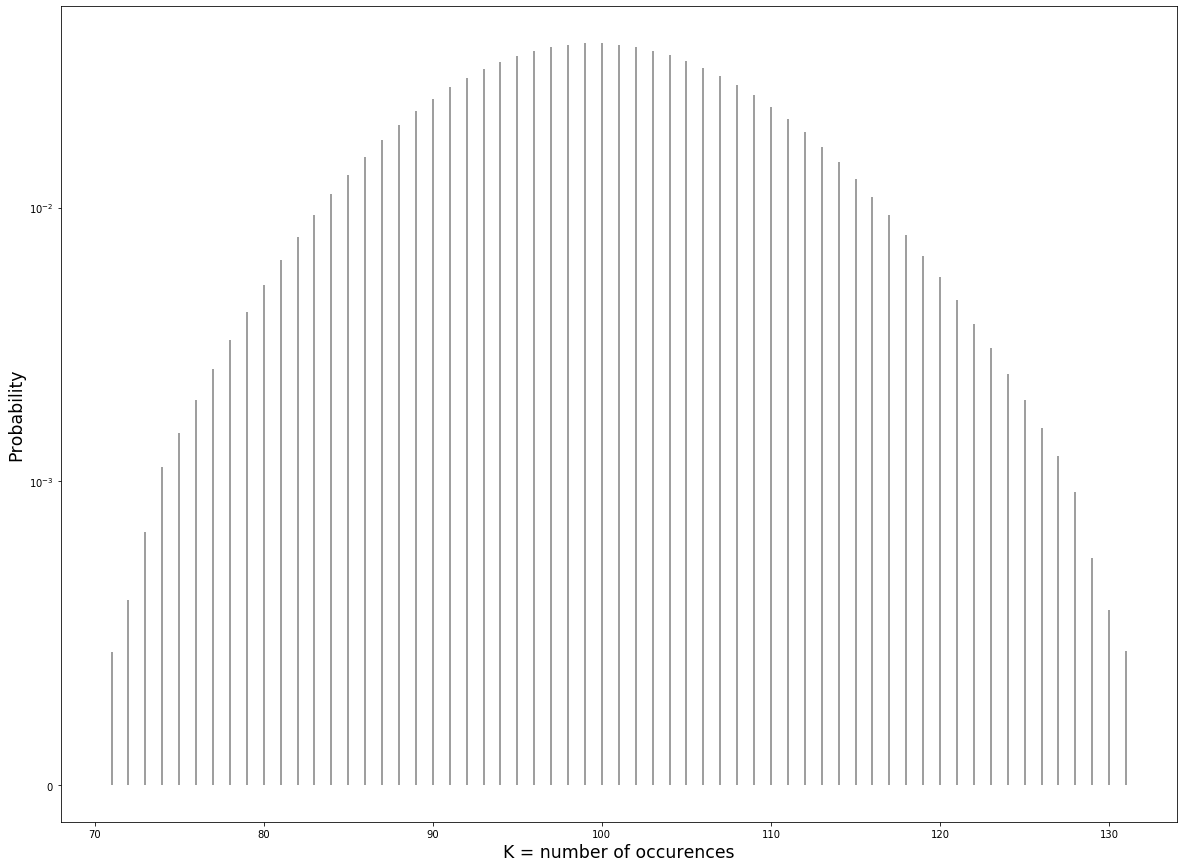

In [20]:
fig, ax = plt.subplots(1,1)

# Setting mean equal to 99 will allow a poisson distribution with a mean of 100
mean = 100

# Creating random variates
stats.poisson.rvs(mu=mean, loc=0, size=10000)

# Creating x axis of occurences for discrete events
x = np.arange(stats.poisson.ppf(0.001, mu=mean), stats.poisson.ppf(0.999, mu=mean))

# Plotted (occurences) vs (probability of number of occurences)
ax.vlines(x, 0, stats.poisson.pmf(x, mu=mean), label='Background Poisson PMF', alpha=0.5)
ax.set_yscale('symlog', nonposy='clip', linthreshy=0.001)
ax.set_xlabel('K = number of occurences', fontsize='xx-large')
ax.set_ylabel('Probability', fontsize='xx-large')
plt.show()

In [30]:
sigma5 = 1-stats.norm.cdf(5, loc=0, scale=1)
print(f'Probability for finding a 5 sigma detection is a probability of {sigma5}')

high5 = stats.poisson.ppf(1-sigma5, mu=mean, loc=0)
print(f'The detection value on the occurence axis would need to be to be greater than or equal to {high5} in order to be considered a legitimate detection')

low5 = stats.poisson.ppf(sigma5, mu=mean, loc=0)
print(f'The detection value on the occurence axis would need to be less than or equal to {low5} occurences in order to be considered a legitimate detection')

Probability for finding a 5 sigma detection is a probability of 2.866515719235352e-07
The detection value on the occurence axis would need to be to be greater than or equal to 154.0 in order to be considered a legitimate detection
The detection value on the occurence axis would need to be less than or equal to 54.0 occurences in order to be considered a legitimate detection


- I find that the 5$\sigma$ threshold is any occurence count of 54 and below, or 154 and above, on the x-axis

## Problem 2)
- I now want to inject a signal of known strength (within the range of 8-30$\sigma$) into the background data many times.

In [116]:
sigmaX = stats.norm.sf(8)
sigmaX
highX = stats.poisson.ppf(1-sigmaX, mu=mean, loc=0)
highX

array([117,  88,  89,  91, 100])

In [170]:
a = stats.poisson.rvs(mu=mean, loc=0, size=35000, random_state=1)

b = [190, 191, 192, 193, 194, 189, 188, 187, 186]
for i in range(5):
    b = np.concatenate([b, b])
    b2 = b

for i in range(250):
    a = np.concatenate([a, b])
    a2 = a

print(max(a2))
print(min(a2))
print(len(a2))
b2

194
64
107000


array([190, 191, 192, 193, 194, 189, 188, 187, 186, 190, 191, 192, 193,
       194, 189, 188, 187, 186, 190, 191, 192, 193, 194, 189, 188, 187,
       186, 190, 191, 192, 193, 194, 189, 188, 187, 186, 190, 191, 192,
       193, 194, 189, 188, 187, 186, 190, 191, 192, 193, 194, 189, 188,
       187, 186, 190, 191, 192, 193, 194, 189, 188, 187, 186, 190, 191,
       192, 193, 194, 189, 188, 187, 186, 190, 191, 192, 193, 194, 189,
       188, 187, 186, 190, 191, 192, 193, 194, 189, 188, 187, 186, 190,
       191, 192, 193, 194, 189, 188, 187, 186, 190, 191, 192, 193, 194,
       189, 188, 187, 186, 190, 191, 192, 193, 194, 189, 188, 187, 186,
       190, 191, 192, 193, 194, 189, 188, 187, 186, 190, 191, 192, 193,
       194, 189, 188, 187, 186, 190, 191, 192, 193, 194, 189, 188, 187,
       186, 190, 191, 192, 193, 194, 189, 188, 187, 186, 190, 191, 192,
       193, 194, 189, 188, 187, 186, 190, 191, 192, 193, 194, 189, 188,
       187, 186, 190, 191, 192, 193, 194, 189, 188, 187, 186, 19

- Now the distribution has an injected signal of known strength (190 or 8$\sigma$) inserted into it many times over
### Problem 2A)
- I want a histogram showing how bright the observed signal appears to be

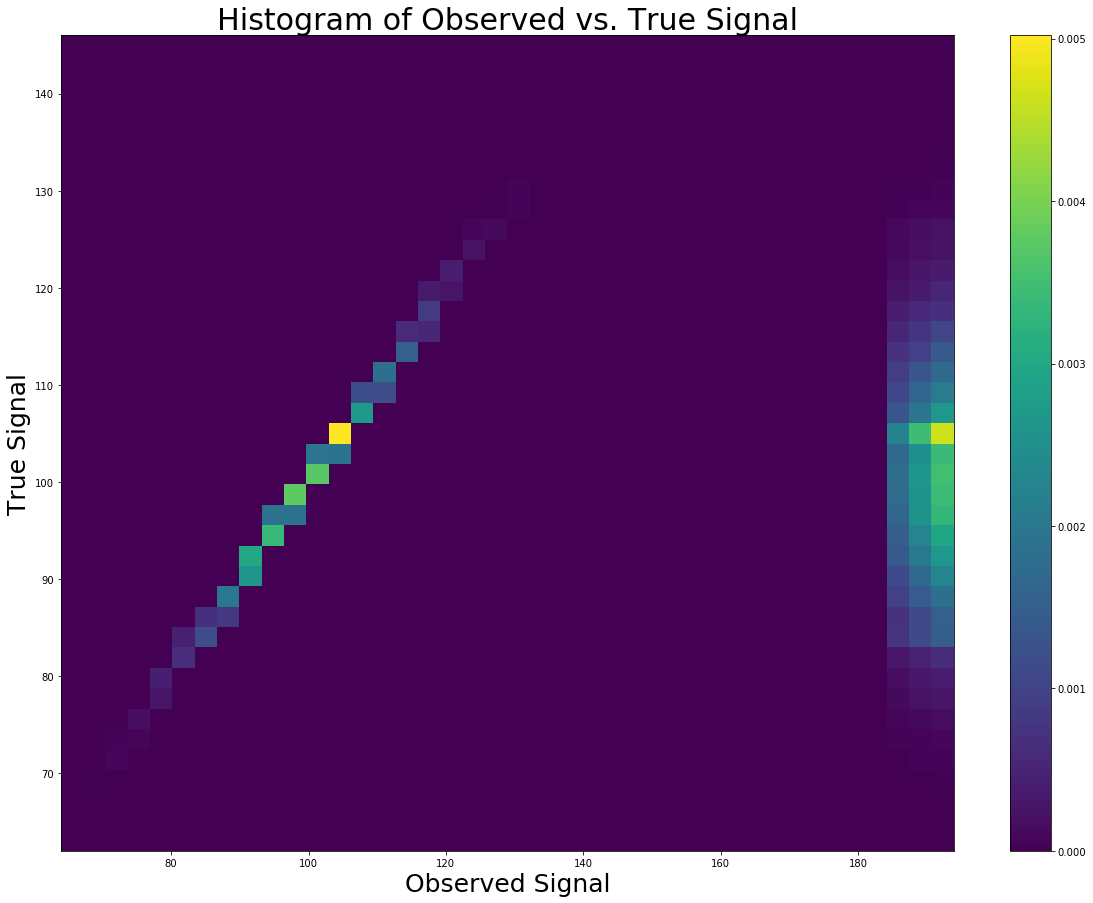

In [174]:
true = stats.poisson.rvs(mu=mean, loc=0, size=len(a2), random_state=1)
fig, ax = plt.subplots(1,1)
box = ax.hist2d(a2, true, bins=40, density=True)
ax.set_xlabel('Observed Signal', size=25)
ax.set_ylabel('True Signal', size=25)
ax.set_title('Histogram of Observed vs. True Signal', size=30)
boxp = plt.colorbar(box[3], ax=ax)
plt.show()

- The histogram shows that for any observed signal on the x-axis around 190, there is a chance that the true signal being shown is actually much lower. 
- I also see that measuring any observed signal of 190 gives me a higher probability for a true value centered around the mean than towards the low or high ends of the distribution
  - I.e. It's more likely that a true signal was to be found around the mean of 100 and then got distorted during measurement to become 190 something, than for a signal around 50 or 150 to be a true signal and to then be distorted with some injection during measurement to force it to be measured as 190.
  
### Problem 2B)